In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA READING

In [4]:
cm=pd.read_csv(r"F:\All pc files\da\datasets for projects\archive (10)\flight_dataset.csv")
cm

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


# DATA CLEANING

In [7]:
cm.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

In [9]:
cm.dtypes

Airline           object
Source            object
Destination       object
Total_Stops        int64
Price              int64
Date               int64
Month              int64
Year               int64
Dep_hours          int64
Dep_min            int64
Arrival_hours      int64
Arrival_min        int64
Duration_hours     int64
Duration_min       int64
dtype: object

In [13]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [15]:
for i in cm.columns:
    print(i,":",'\n',cm[i].unique)

Airline : 
 <bound method Series.unique of 0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10683, dtype: object>
Source : 
 <bound method Series.unique of 0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10683, dtype: object>
Destination : 
 <bound method Series.unique of 0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10678     Banglore
10679     Banglore
10680        Delhi
10681    New Delhi
10682       Cochin
Name: Destination, Length: 10683, dtype: object>
Total_Stops : 
 <bound method Series.unique of 0        0
1        2
2        2
3        1
4

In [17]:
cm.describe(include="all")

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683,10683,10683,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
unique,12,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jet Airways,Delhi,Cochin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3849,4537,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,NaN,NaN,NaN,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,NaN,NaN,NaN,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,NaN,NaN,NaN,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,NaN,NaN,NaN,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000


# DATA ANALYSIS

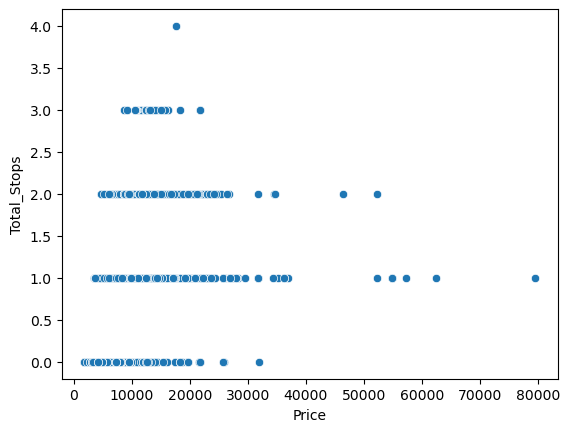

In [20]:
sns.scatterplot(x=cm.Price,y=cm.Total_Stops)
plt.show()

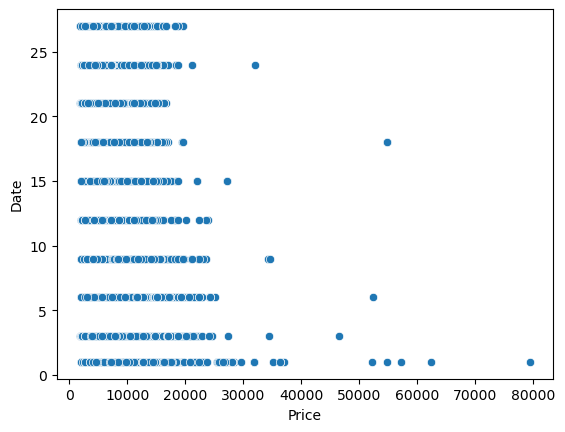

In [22]:
sns.scatterplot(x=cm.Price,y=cm.Date)
plt.show()

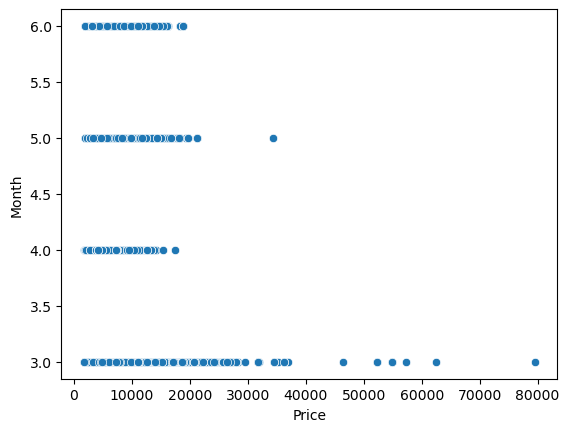

In [24]:
sns.scatterplot(x=cm.Price,y=cm.Month)
plt.show()

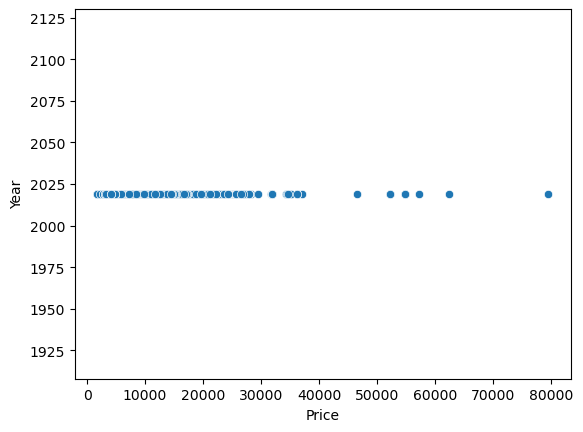

In [26]:
sns.scatterplot(x=cm.Price,y=cm.Year)
plt.show()

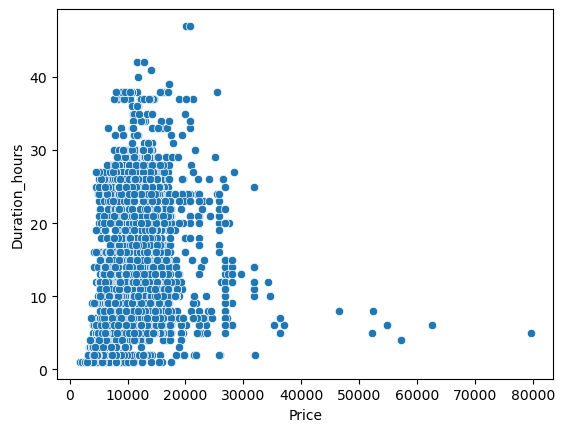

In [28]:
sns.scatterplot(x=cm.Price,y=cm.Duration_hours)
plt.show()

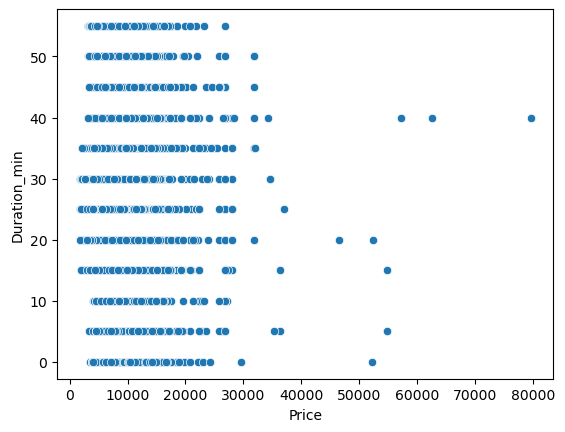

In [30]:


sns.scatterplot(x=cm.Price,y=cm.Duration_min)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

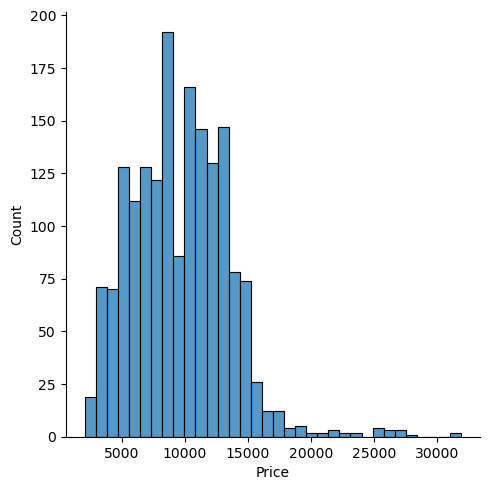

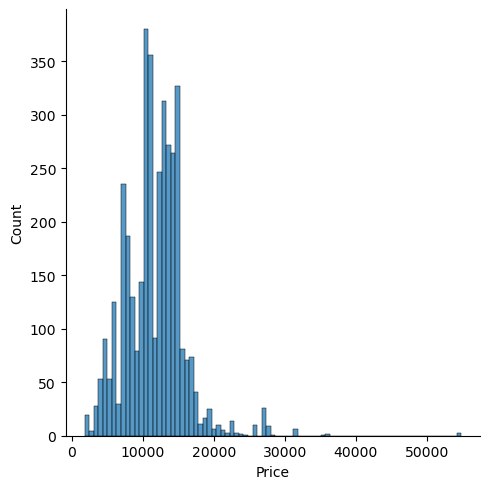

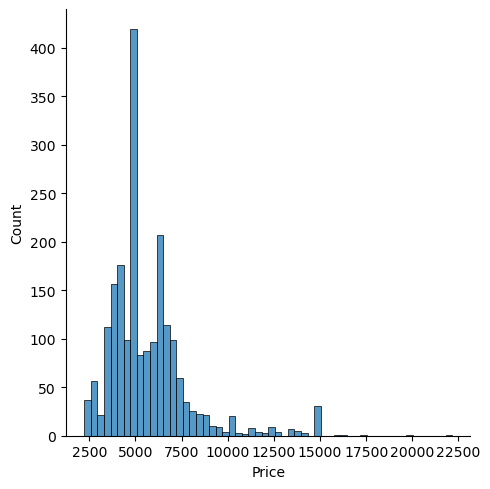

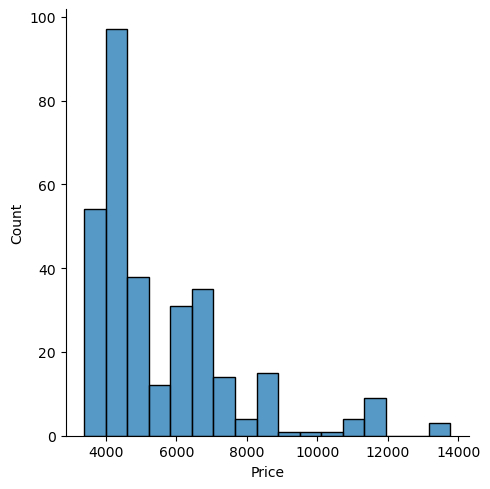

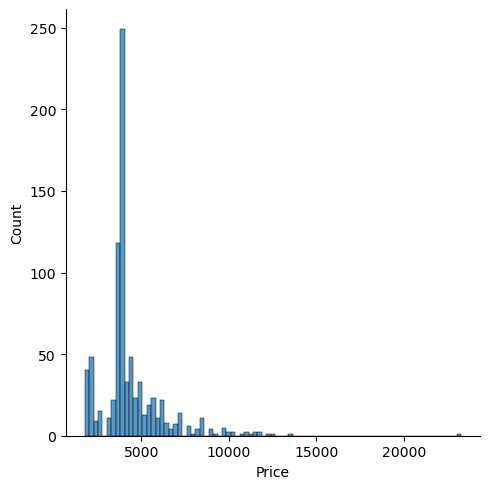

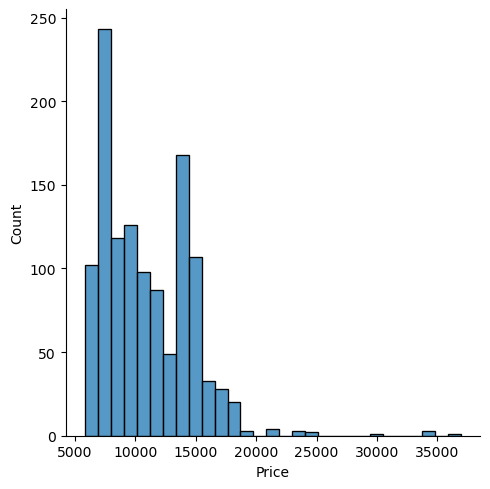

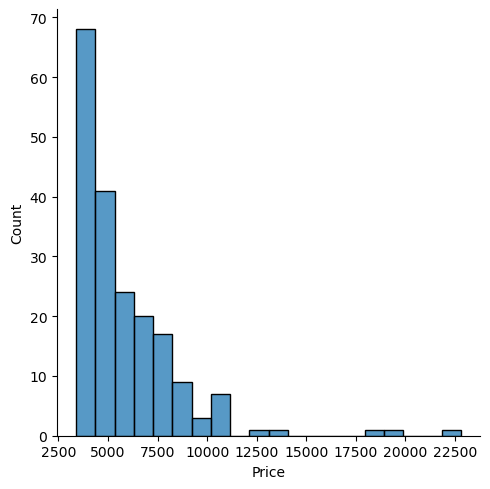

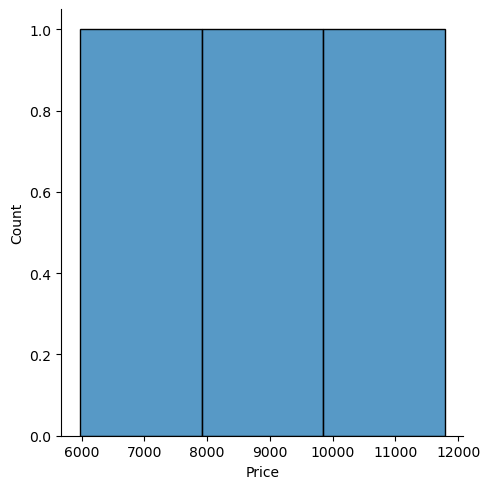

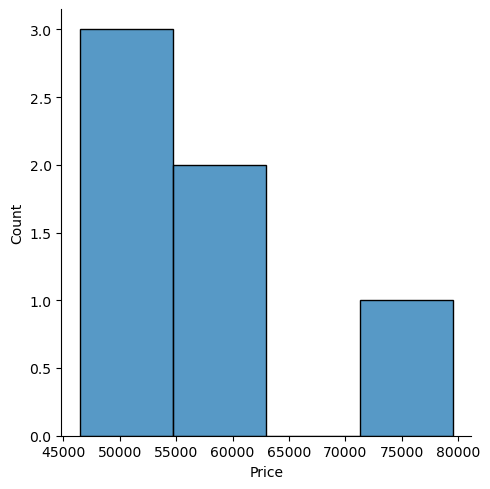

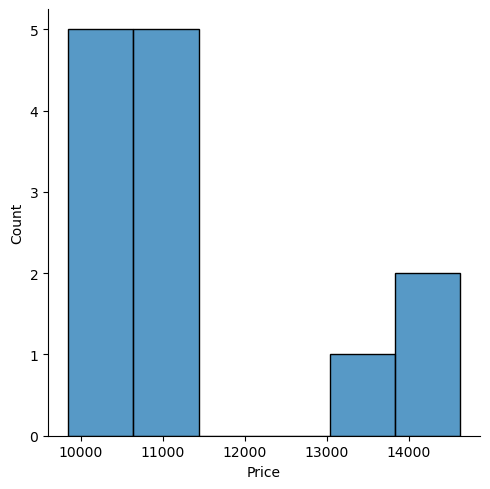

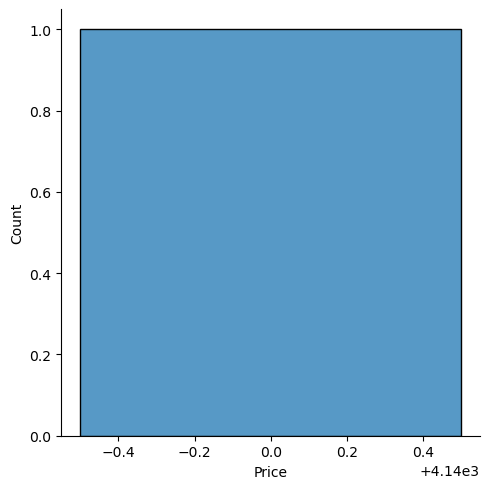

In [32]:
sns.displot(cm.Price[cm.Airline=='Air India'])
sns.displot(cm.Price[cm.Airline=='Jet Airways'])
sns.displot(cm.Price[cm.Airline=='IndiGo'])
sns.displot(cm.Price[cm.Airline=='Air Asia'])
sns.displot(cm.Price[cm.Airline=='SpiceJet'])
sns.displot(cm.Price[cm.Airline=='Multiple carriers'])
sns.displot(cm.Price[cm.Airline=='GoAir'])
sns.displot(cm.Price[cm.Airline=='Vistara Premium economy'])
sns.displot(cm.Price[cm.Airline=='Jet Airways Business'])
sns.displot(cm.Price[cm.Airline=='Multiple carriers Premium economy'])
sns.displot(cm.Price[cm.Airline=='Trujet'])
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

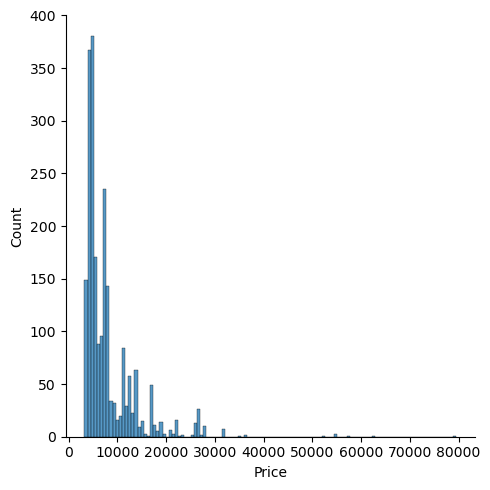

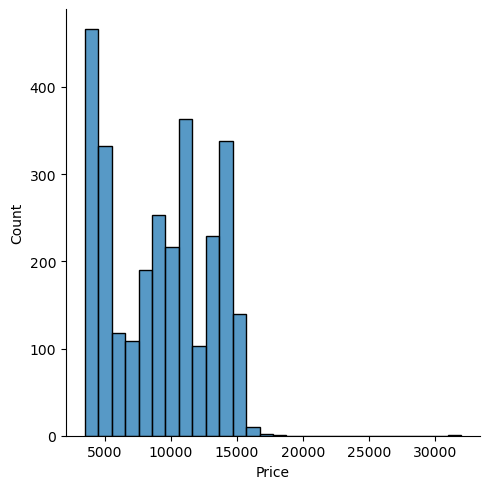

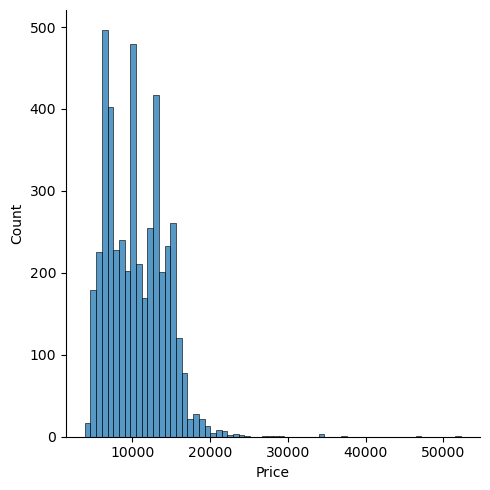

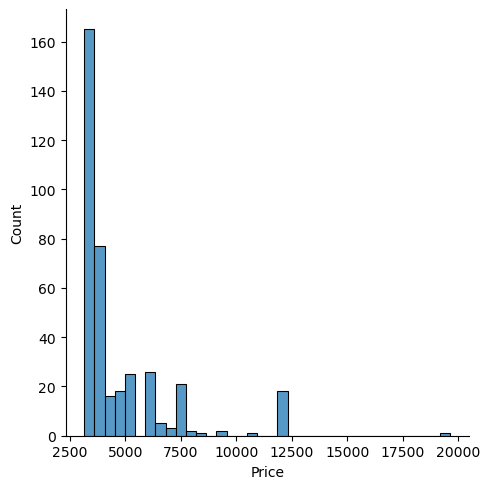

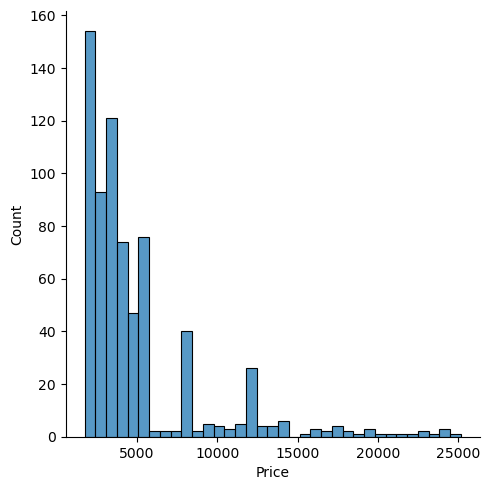

In [33]:
sns.displot(cm.Price[cm.Source=='Banglore'])
sns.displot(cm.Price[cm.Source=='Kolkata'])
sns.displot(cm.Price[cm.Source=='Delhi'])
sns.displot(cm.Price[cm.Source=='Chennai'])
sns.displot(cm.Price[cm.Source=='Mumbai'])
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

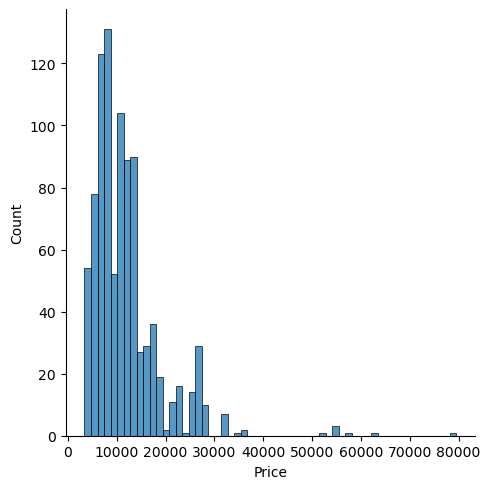

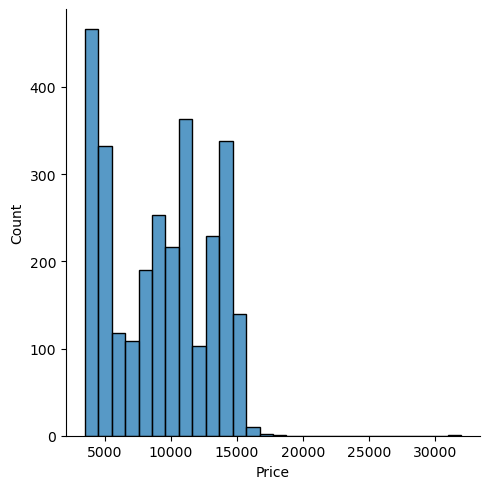

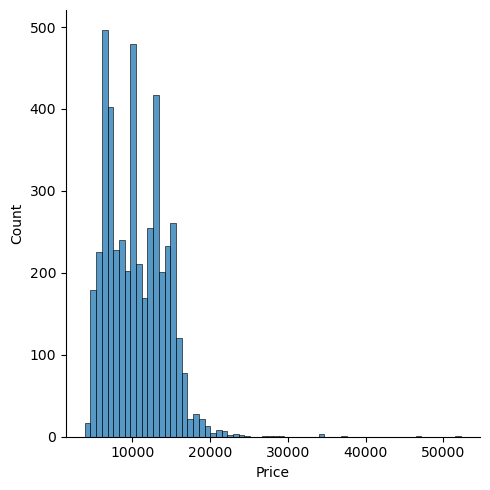

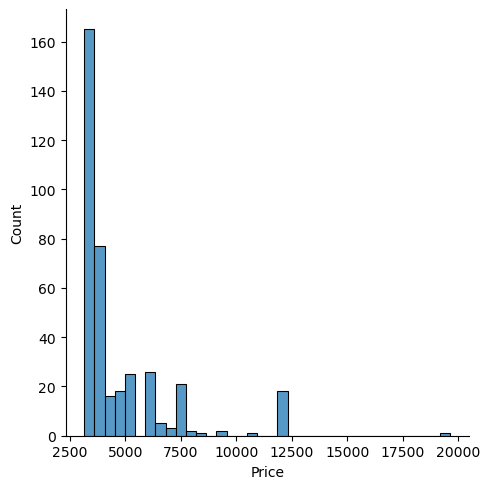

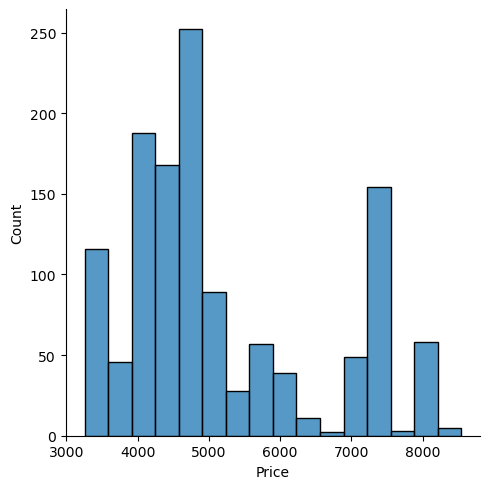

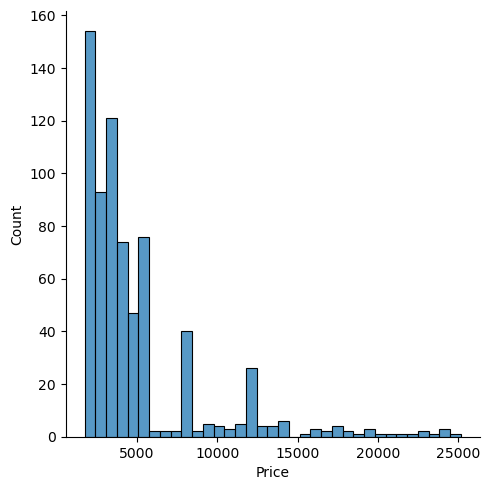

In [34]:
sns.displot(cm.Price[cm.Destination=='New Delhi'])
sns.displot(cm.Price[cm.Destination=='Banglore'])
sns.displot(cm.Price[cm.Destination=='Cochin'])
sns.displot(cm.Price[cm.Destination=='Kolkata'])
sns.displot(cm.Price[cm.Destination=='Delhi'])
sns.displot(cm.Price[cm.Destination=='Hyderabad'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2028\1589534672.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cm.Price[cm.Airline=='Air India'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_2028\1589534672.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
sim

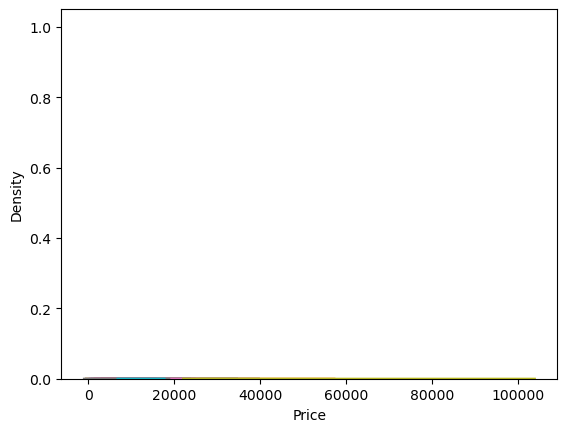

In [35]:
sns.distplot(cm.Price[cm.Airline=='Air India'])
sns.distplot(cm.Price[cm.Airline=='Jet Airways'])
sns.distplot(cm.Price[cm.Airline=='IndiGo'])
sns.distplot(cm.Price[cm.Airline=='Air Asia'])
sns.distplot(cm.Price[cm.Airline=='SpiceJet'])
sns.distplot(cm.Price[cm.Airline=='Multiple carriers'])
sns.distplot(cm.Price[cm.Airline=='GoAir'])
sns.distplot(cm.Price[cm.Airline=='Vistara Premium economy'])
sns.distplot(cm.Price[cm.Airline=='Jet Airways Business'])
sns.distplot(cm.Price[cm.Airline=='Multiple carriers Premium economy'])
sns.distplot(cm.Price[cm.Airline=='Trujet'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2028\580752679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cm.Price[cm.Source=='Banglore'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_2028\580752679.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar

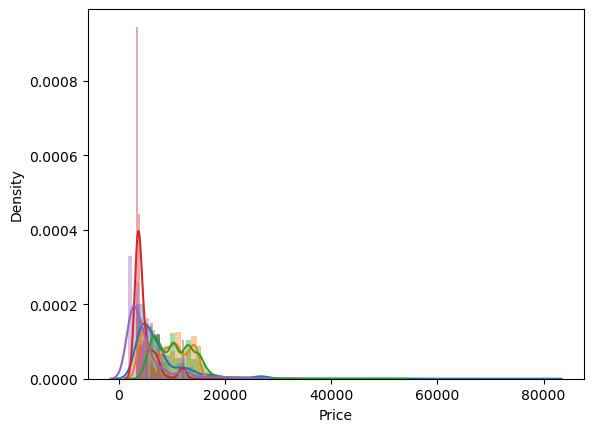

In [37]:
sns.distplot(cm.Price[cm.Source=='Banglore'])
sns.distplot(cm.Price[cm.Source=='Kolkata'])
sns.distplot(cm.Price[cm.Source=='Delhi'])
sns.distplot(cm.Price[cm.Source=='Chennai'])
sns.distplot(cm.Price[cm.Source=='Mumbai'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2028\2303494922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cm.Price[cm.Destination=='New Delhi'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_2028\2303494922.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with

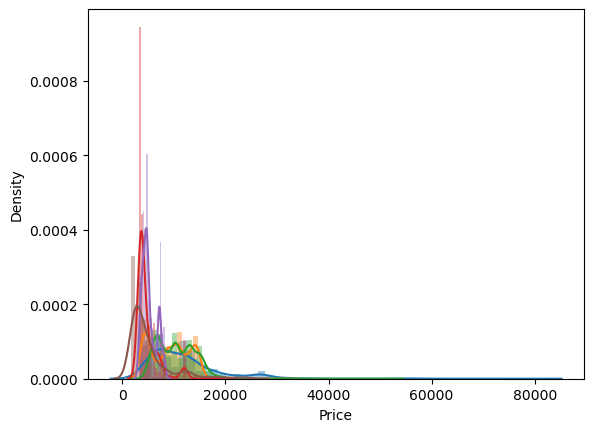

In [38]:
sns.distplot(cm.Price[cm.Destination=='New Delhi'])
sns.distplot(cm.Price[cm.Destination=='Banglore'])
sns.distplot(cm.Price[cm.Destination=='Cochin'])
sns.distplot(cm.Price[cm.Destination=='Kolkata'])
sns.distplot(cm.Price[cm.Destination=='Delhi'])
sns.distplot(cm.Price[cm.Destination=='Hyderabad'])
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

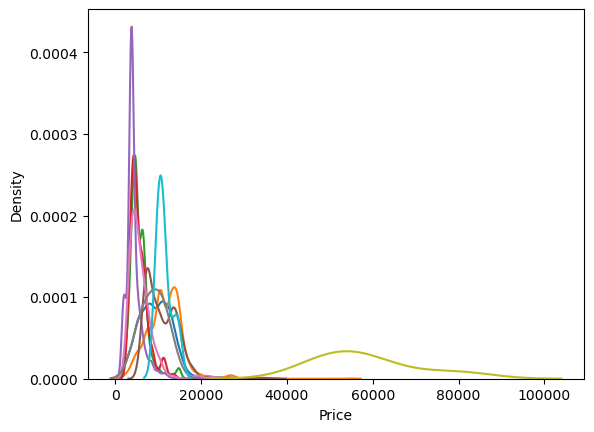

In [40]:
sns.kdeplot(cm.Price[cm.Airline=='Air India'])
sns.kdeplot(cm.Price[cm.Airline=='Jet Airways'])
sns.kdeplot(cm.Price[cm.Airline=='IndiGo'])
sns.kdeplot(cm.Price[cm.Airline=='Air Asia'])
sns.kdeplot(cm.Price[cm.Airline=='SpiceJet'])
sns.kdeplot(cm.Price[cm.Airline=='Multiple carriers'])
sns.kdeplot(cm.Price[cm.Airline=='GoAir'])
sns.kdeplot(cm.Price[cm.Airline=='Vistara Premium economy'])
sns.kdeplot(cm.Price[cm.Airline=='Jet Airways Business'])
sns.kdeplot(cm.Price[cm.Airline=='Multiple carriers Premium economy'])
sns.kdeplot(cm.Price[cm.Airline=='Trujet'])
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

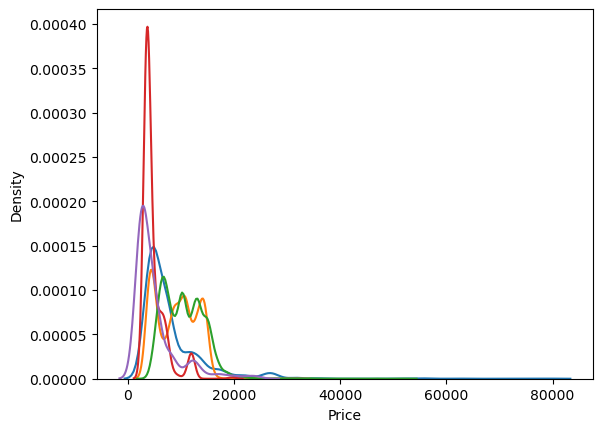

In [41]:
sns.kdeplot(cm.Price[cm.Source=='Banglore'])
sns.kdeplot(cm.Price[cm.Source=='Kolkata'])
sns.kdeplot(cm.Price[cm.Source=='Delhi'])
sns.kdeplot(cm.Price[cm.Source=='Chennai'])
sns.kdeplot(cm.Price[cm.Source=='Mumbai'])
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

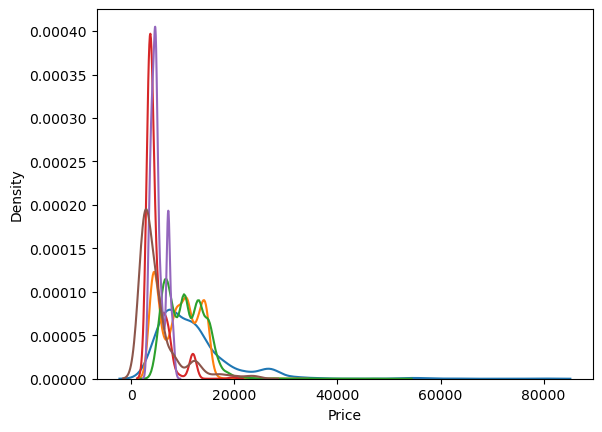

In [43]:
sns.kdeplot(cm.Price[cm.Destination=='New Delhi'])
sns.kdeplot(cm.Price[cm.Destination=='Banglore'])
sns.kdeplot(cm.Price[cm.Destination=='Cochin'])
sns.kdeplot(cm.Price[cm.Destination=='Kolkata'])
sns.kdeplot(cm.Price[cm.Destination=='Delhi'])
sns.kdeplot(cm.Price[cm.Destination=='Hyderabad'])
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

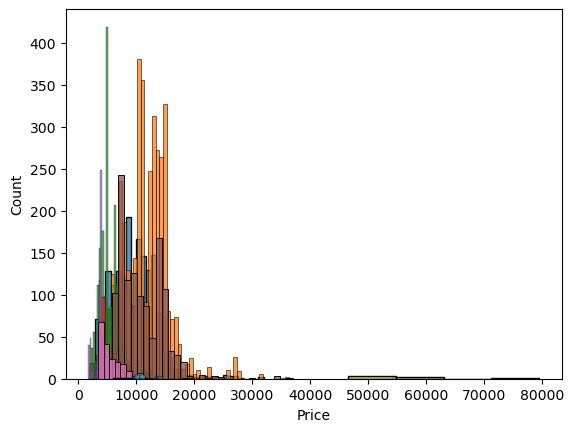

In [45]:
sns.histplot(cm.Price[cm.Airline=='Air India'])
sns.histplot(cm.Price[cm.Airline=='Jet Airways'])
sns.histplot(cm.Price[cm.Airline=='IndiGo'])
sns.histplot(cm.Price[cm.Airline=='Air Asia'])
sns.histplot(cm.Price[cm.Airline=='SpiceJet'])
sns.histplot(cm.Price[cm.Airline=='Multiple carriers'])
sns.histplot(cm.Price[cm.Airline=='GoAir'])
sns.histplot(cm.Price[cm.Airline=='Vistara Premium economy'])
sns.histplot(cm.Price[cm.Airline=='Jet Airways Business'])
sns.histplot(cm.Price[cm.Airline=='Multiple carriers Premium economy'])
sns.histplot(cm.Price[cm.Airline=='Trujet'])
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

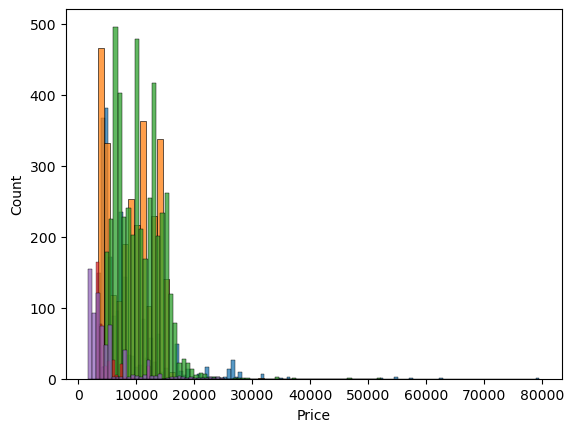

In [47]:
sns.histplot(cm.Price[cm.Source=='Banglore'])
sns.histplot(cm.Price[cm.Source=='Kolkata'])
sns.histplot(cm.Price[cm.Source=='Delhi'])
sns.histplot(cm.Price[cm.Source=='Chennai'])
sns.histplot(cm.Price[cm.Source=='Mumbai'])
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

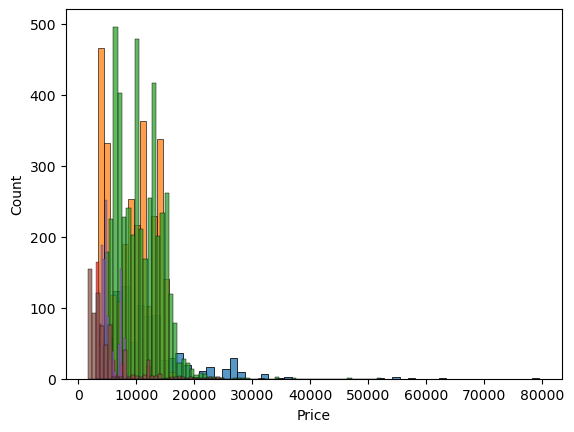

In [50]:
sns.histplot(cm.Price[cm.Destination=='New Delhi'])
sns.histplot(cm.Price[cm.Destination=='Banglore'])
sns.histplot(cm.Price[cm.Destination=='Cochin'])
sns.histplot(cm.Price[cm.Destination=='Kolkata'])
sns.histplot(cm.Price[cm.Destination=='Delhi'])
sns.histplot(cm.Price[cm.Destination=='Hyderabad'])
plt.show()

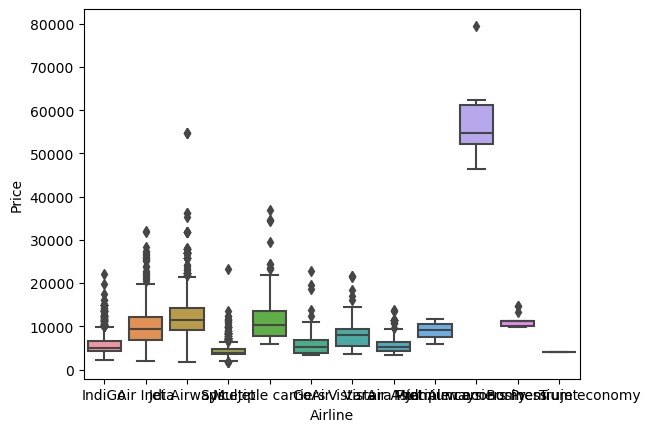

In [53]:
sns.boxplot(x=cm.Airline,y=cm.Price)
plt.show()

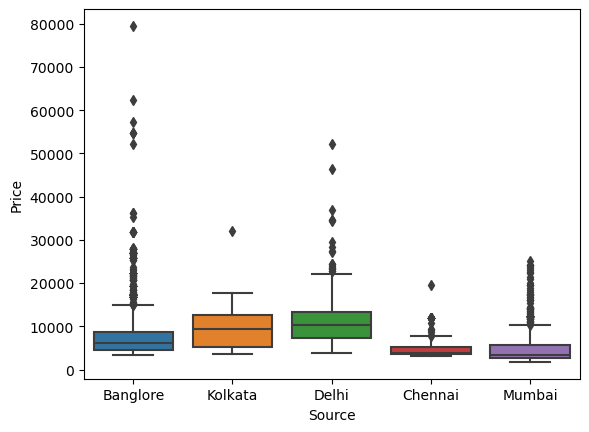

In [55]:
sns.boxplot(x=cm.Source,y=cm.Price)
plt.show()

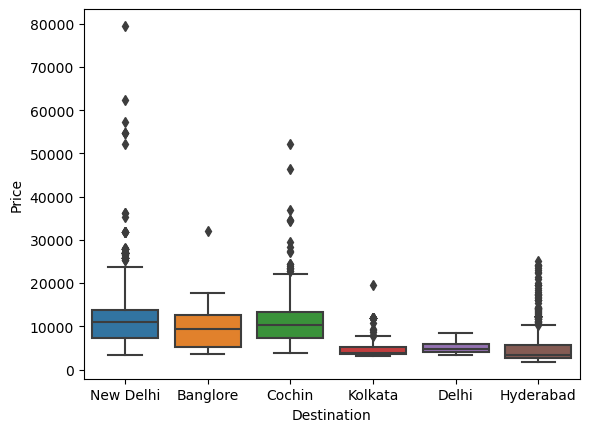

In [60]:
sns.boxplot(x=cm.Destination,y=cm.Price)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

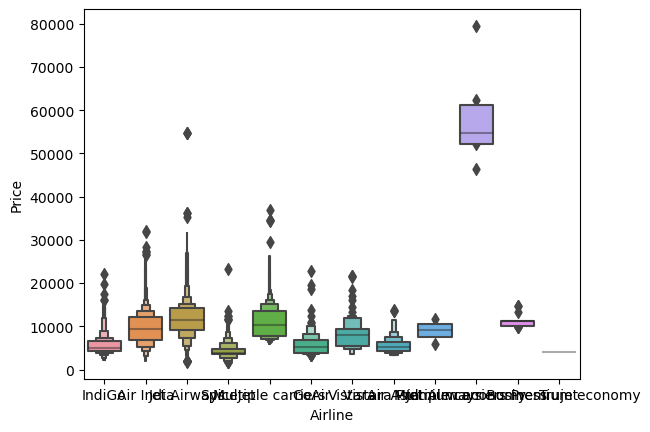

In [62]:
sns.boxenplot(x=cm.Airline,y=cm.Price)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

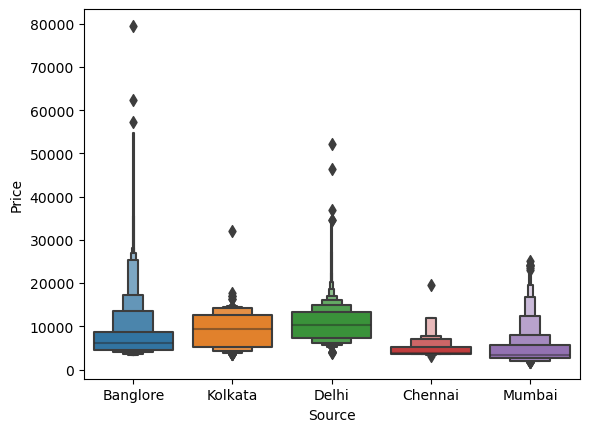

In [64]:
sns.boxenplot(x=cm.Source,y=cm.Price)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

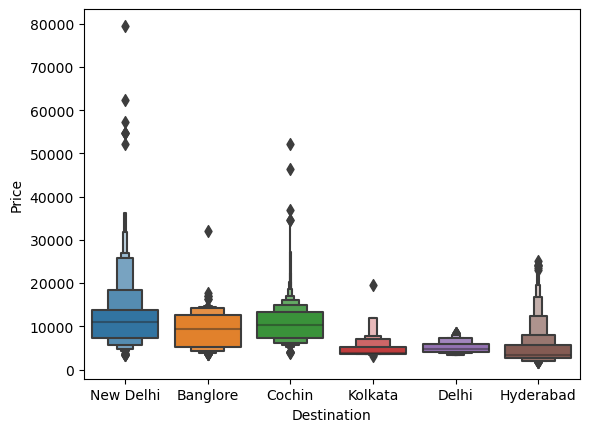

In [66]:
sns.boxenplot(x=cm.Destination,y=cm.Price)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


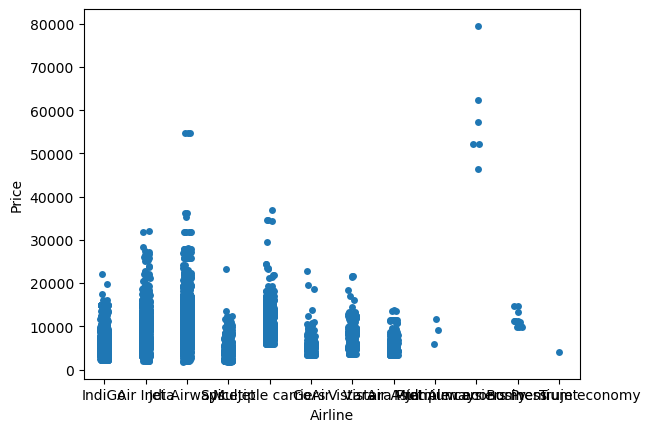

In [68]:
sns.stripplot(x=cm.Airline,y=cm.Price)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


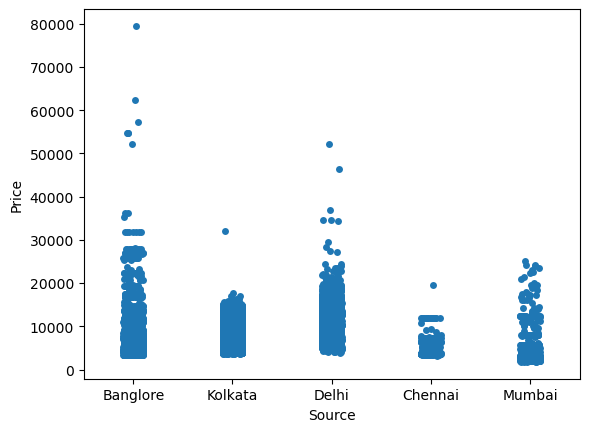

In [70]:
sns.stripplot(x=cm.Source,y=cm.Price)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


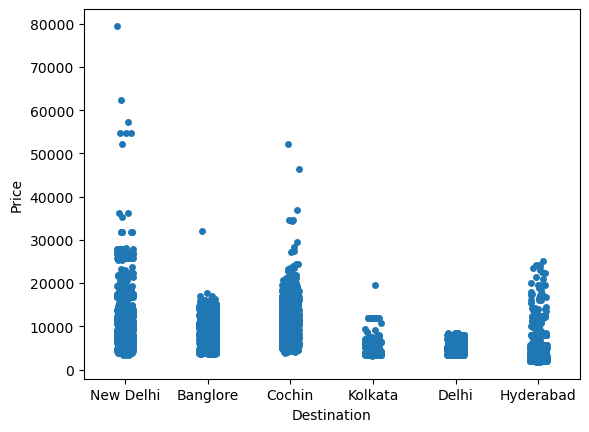

In [72]:
sns.stripplot(x=cm.Destination,y=cm.Price)
plt.show()

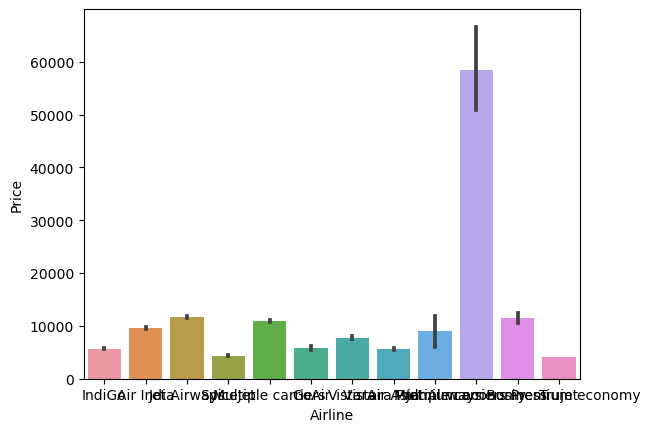

In [74]:
sns.barplot(x=cm.Airline,y=cm.Price)
plt.show()

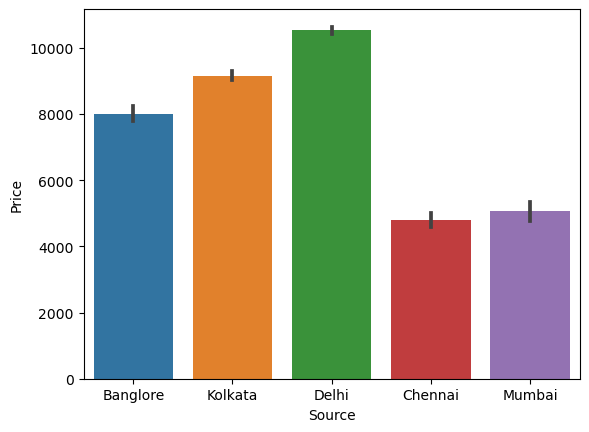

In [76]:
sns.barplot(x=cm.Source,y=cm.Price)
plt.show()

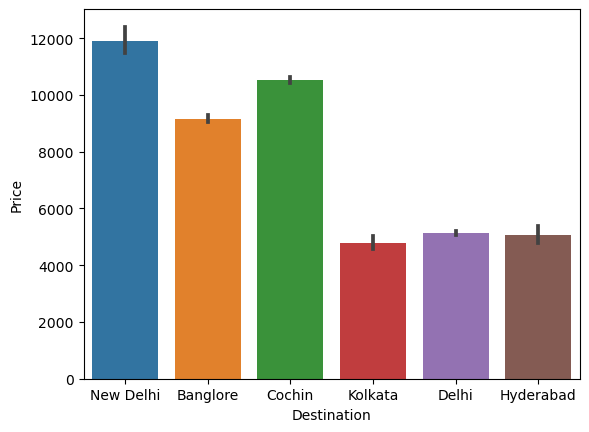

In [78]:
sns.barplot(x=cm.Destination,y=cm.Price)
plt.show()

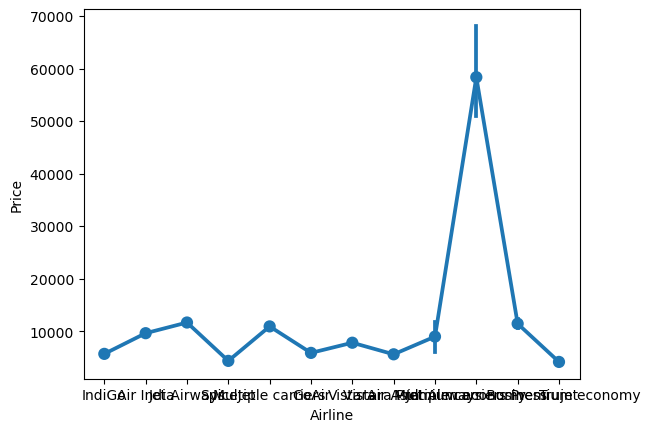

In [80]:
sns.pointplot(x=cm.Airline,y=cm.Price)
plt.show()

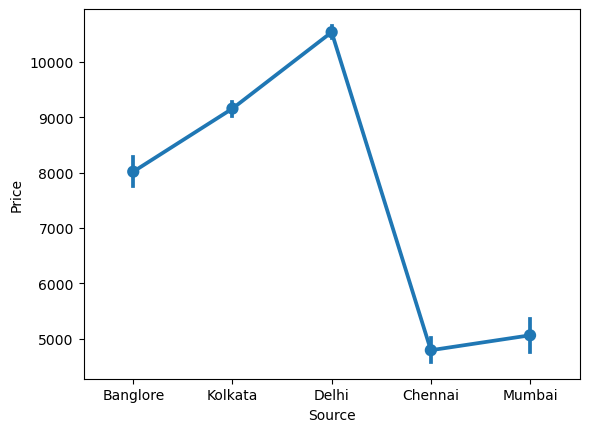

In [82]:
sns.pointplot(x=cm.Source,y=cm.Price)
plt.show()

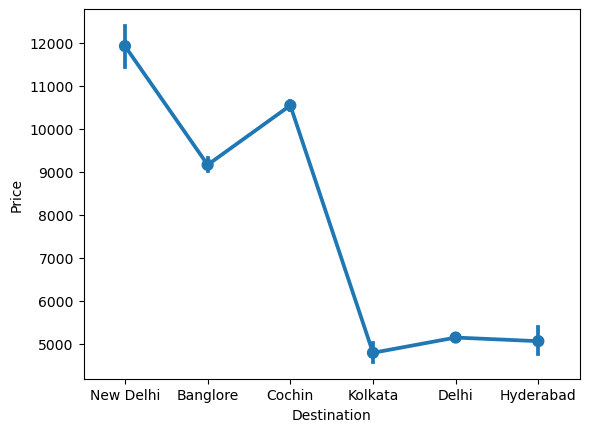

In [84]:
sns.pointplot(x=cm.Destination,y=cm.Price)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


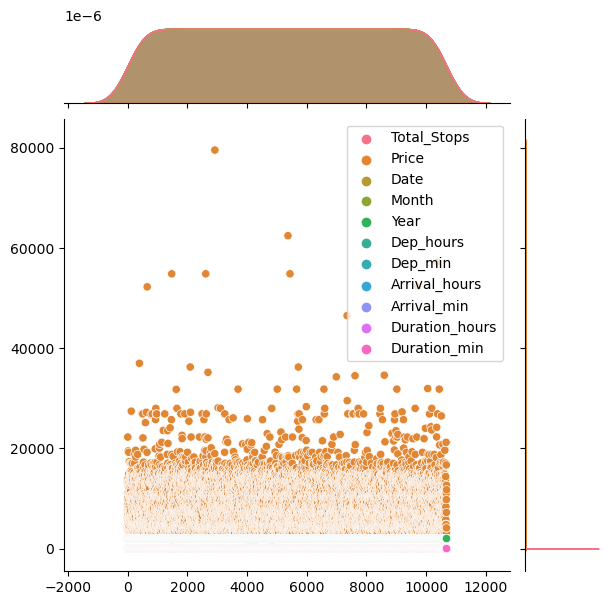

In [86]:
sns.jointplot(data=cm)
plt.show()

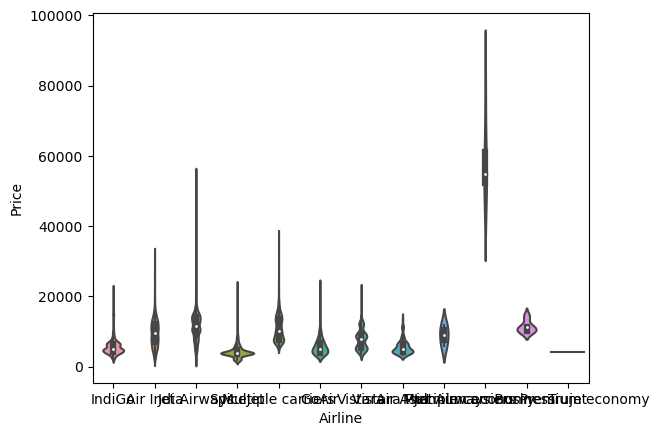

In [87]:
sns.violinplot(x=cm.Airline,y=cm.Price)
plt.show()

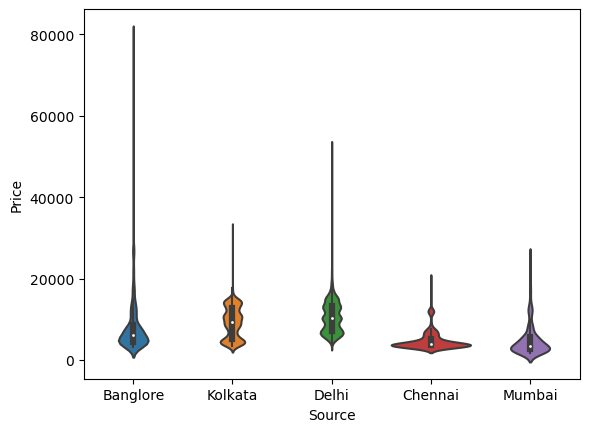

In [88]:
sns.violinplot(x=cm.Source,y=cm.Price)
plt.show()

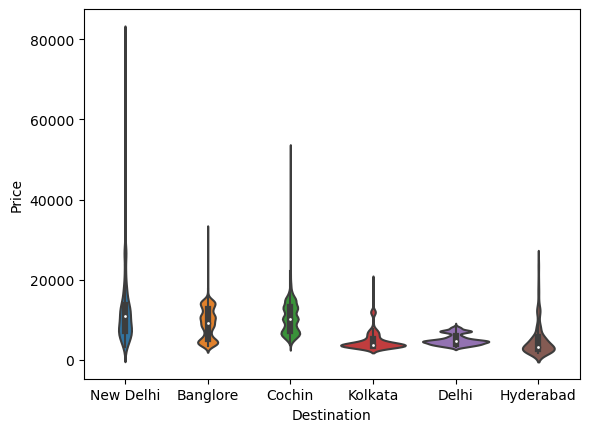

In [92]:
sns.violinplot(x=cm.Destination,y=cm.Price)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

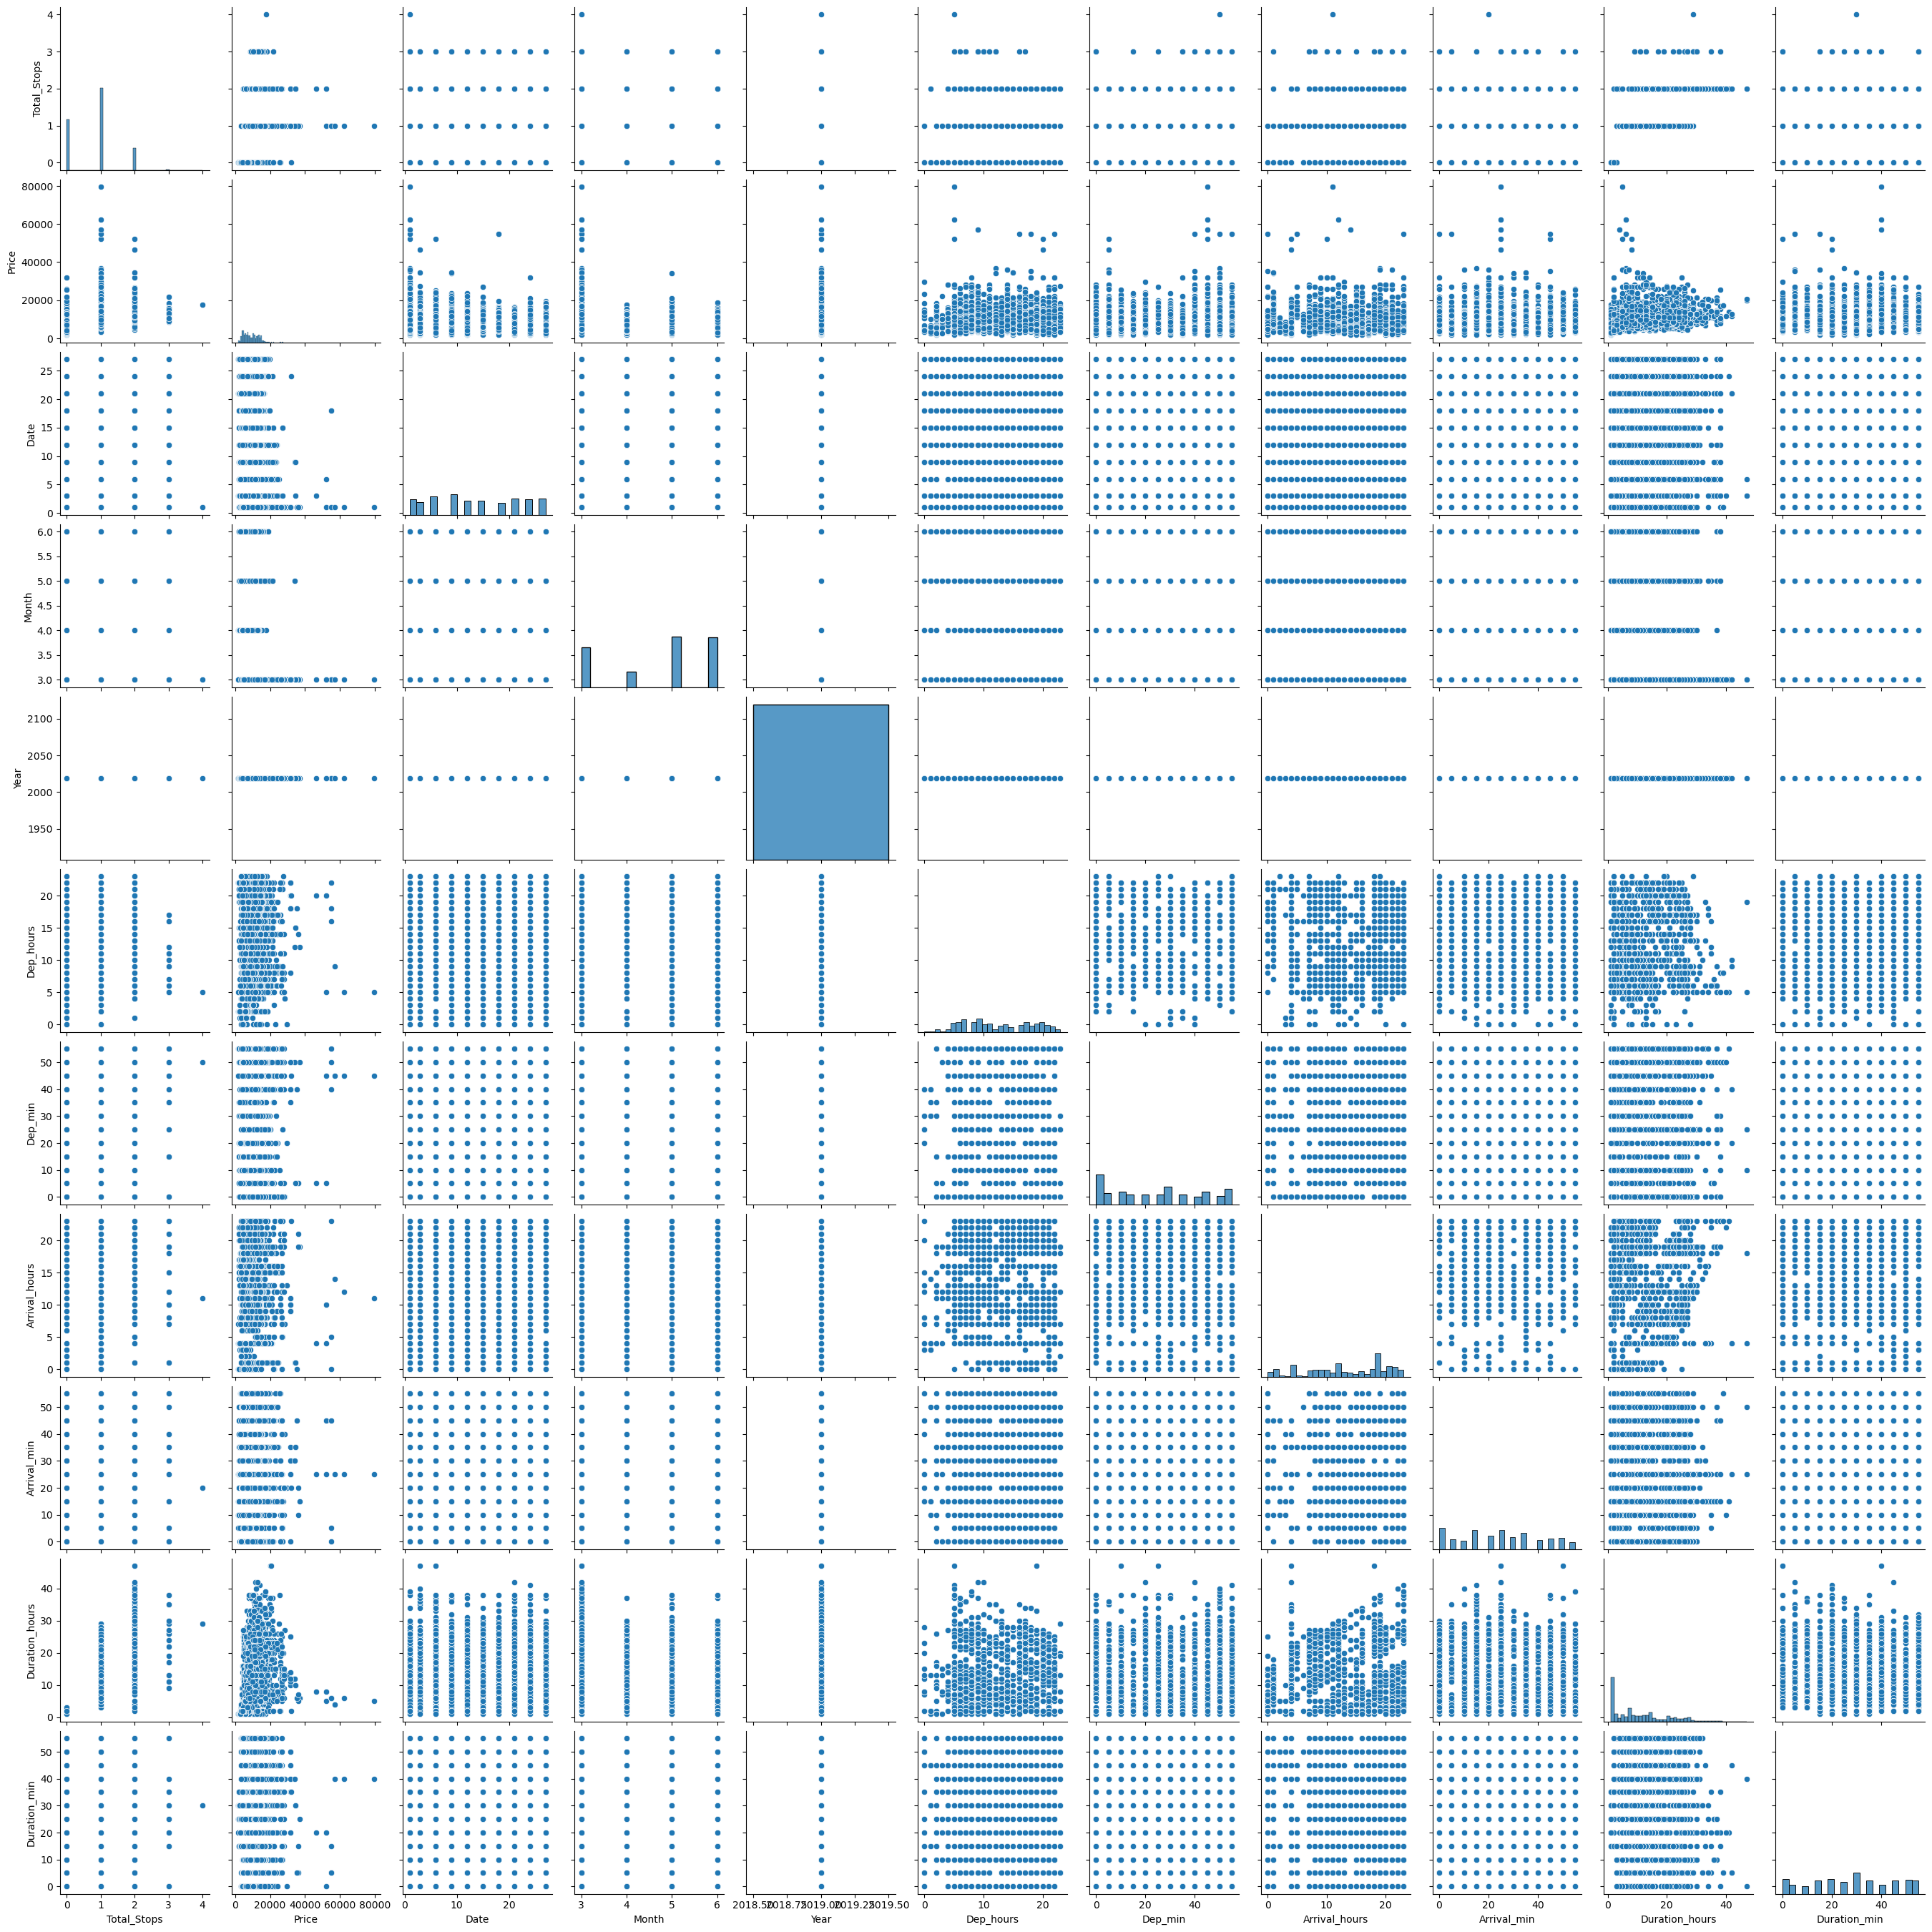

In [258]:
sns.pairplot(cm)
plt.show()

# ENCODING

In [94]:
from sklearn.preprocessing import LabelEncoder

In [96]:
le=LabelEncoder()
cm.Airline=le.fit_transform(cm.Airline)

In [98]:
le1=LabelEncoder()
cm.Source=le1.fit_transform(cm.Source)

In [100]:
le2=LabelEncoder()
cm.Destination=le2.fit_transform(cm.Destination)

In [102]:
cm.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,3,0,5,0,3897,24,3,2019,22,20,1,10,2,50
1,1,3,0,2,7662,1,5,2019,5,50,13,15,7,25
2,4,2,1,2,13882,9,6,2019,9,25,4,25,19,0
3,3,3,0,1,6218,12,5,2019,18,5,23,30,5,25
4,3,0,5,1,13302,1,3,2019,16,50,21,35,4,45


In [104]:
cm.Source.unique()

array([0, 3, 2, 1, 4])

In [106]:
cm.Airline.unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [108]:
le.inverse_transform([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [110]:
le1.inverse_transform([0, 3, 2, 1, 4])

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [112]:
cm.Destination.unique()

array([5, 0, 1, 4, 2, 3])

In [114]:
le2.inverse_transform([5, 0, 1, 4, 2, 3])

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

# INPUT AND OUTPUT CREATION

In [117]:
ip=cm.drop('Price',axis=1)
op=cm.Price

In [119]:
ip.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,3,0,5,0,24,3,2019,22,20,1,10,2,50
1,1,3,0,2,1,5,2019,5,50,13,15,7,25
2,4,2,1,2,9,6,2019,9,25,4,25,19,0
3,3,3,0,1,12,5,2019,18,5,23,30,5,25
4,3,0,5,1,1,3,2019,16,50,21,35,4,45


# TRAIN_TEST_SPLIT

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2,random_state=3)#traindata =80% and testdata=20%

In [124]:
x_train.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
6383,3,2,1,1,9,5,2019,5,10,10,5,4,55
7063,4,3,0,1,9,6,2019,21,10,18,15,21,5
136,4,2,1,2,6,6,2019,6,45,4,25,21,40
5607,1,3,0,2,24,5,2019,10,0,1,20,15,20
402,1,2,1,3,15,6,2019,5,15,7,40,26,25


In [126]:
y_train.head()

6383     6496
7063    10844
136     13376
5607    14083
402     10493
Name: Price, dtype: int64

# STANDARD SCALER

In [129]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train,x_test)

StandardScaler()

# MACHINE LEARNING MODEL

In [132]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [134]:
pred=lr.predict(x_test)
pred

array([ 8336.225711  , 10404.71788334, 10826.01241897, ...,
       11566.99684008,  5050.26129203,  8779.18078843])

In [139]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(pred,y_test)
r2=r2_score(pred,y_test)
print("r2_score:-",r2)
print("mean squared error:-",mse)

r2_score:- -0.23658591853581967
mean squared error:- 11447732.79429885
